# RD107 blockmeshdict data

# General imports

In [37]:
import numpy as np
import math
import matplotlib                       # import matplotlib and its its components for plotting
import matplotlib.pyplot as plt

%matplotlib inline      
%pylab inline
#pylab.rcParams['figure.figsize'] = (8, 5)
#pylab.rcParams['figure.figsize'] = (15, 5)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

from IPython.display import Image, display


Populating the interactive namespace from numpy and matplotlib


# Geometry  reminder

In [38]:
%matplotlib inline      
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 5)
Image(url="https://raw.githubusercontent.com/AndyShor/RD_107/main/figures/RD107.jpg") 
#display(Image)

Populating the interactive namespace from numpy and matplotlib


# Geometry definition

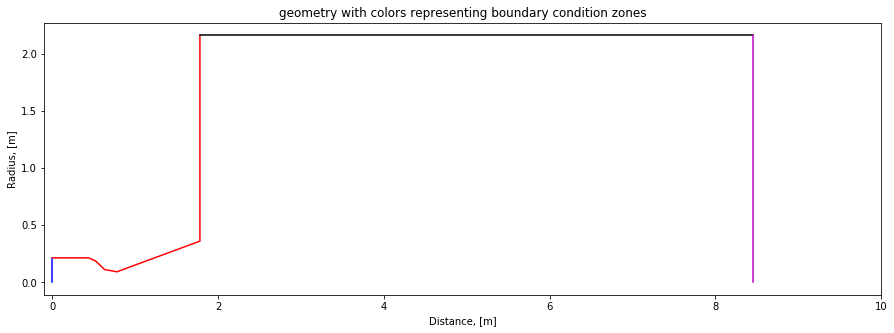

In [36]:
comb_r=0.215 # radius of combustion chamber
comb_l=0.435 # straight length of combustion chamber
comb_r1=0.150 # curvature radius of combustion chamber tapering
comb_half_angle= 35 # half angle of the combustion chamber tapering
throat_r=0.0829 # radius at the nozzle
comb_full_l=0.723 # length of combustion chamber till throat
throat_curv_r=0.165 # curvature radius at the nozzle throat
div_half_angle_1=20 # half angle of the diverging section
straight_1=0.01 # first transitional straight section
div_r=5.8 # curvature radius of the diverging nozzle bell
straight_2=0.014 # straight section at the nozzle exit
div_half_angle_2=10 # half angle of the diverging section at the termination
total_l=1.779 # total length of the engine
bell_r=0.360 # radius of the nozzle bell at the rim
domain_r=6*bell_r # radius of the area behind the nozzle for the plume
domain_ext=1.5*total_l+4 # extra length for the plume
wedge_half_angle=2.5 # half angle to create a wedge

points = np.zeros((31, 3)) # main blockmesh vertices
aux_points = np.zeros((6, 3)) # auxiliary points to specify arc segments

# points 0-8 are placed on the wedge axis

points[0]=(0,0,0)
points[1]=(comb_l,0,0)
points[2]=(comb_l+comb_r1*math.sin(math.pi*comb_half_angle/180),0,0)
points[3]=(comb_full_l-throat_curv_r*math.sin(math.pi*comb_half_angle/180),0,0)
points[4]=(comb_full_l+throat_curv_r*math.sin(math.pi*div_half_angle_1/180),0,0)
points[5]=(points[4,0]+straight_1*math.cos(math.pi*div_half_angle_1/180),0,0)
points[6]=(total_l-straight_2*math.cos(math.pi*div_half_angle_2/180),0,0)
points[7]=(total_l,0,0)
points[8]=(total_l+domain_ext,0,0)

for i in range(9,17):
    points[i,0]=points[i-9,0]
points[9,1]=comb_r
points[10,1]=comb_r
points[11,1]=comb_r-comb_r1*(1-math.cos(math.pi*comb_half_angle/180))
points[12,1]=throat_r+throat_curv_r*(1-math.cos(math.pi*comb_half_angle/180))
points[13,1]=throat_r+throat_curv_r*(1-math.cos(math.pi*div_half_angle_1/180))
points[14,1]=points[13,1]+straight_1*math.sin(math.pi*div_half_angle_1/180)
points[15,1]=bell_r-straight_2*math.sin(math.pi*div_half_angle_2/180)
points[16,1]=bell_r

points[17]=(total_l,domain_r,0)
points[18]=(total_l+domain_ext,domain_r,0)
points[19]=(total_l+domain_ext,bell_r,0)

#plt.style.use('fivethirtyeight')

#plt.plot(points[9:20,0], points[9:20,1])
#plt.plot(points[9:20,0], -1*points[9:20,1])
plt.plot([points[0,0],points[9,0]], [points[0,1],points[9,1]], 'b')
plt.plot(points[9:18,0], points[9:18,1], 'r')
plt.plot(points[17:19,0], points[17:19,1], 'k')
plt.plot([points[18,0],points[19,0],points[8,0]], [points[18,1],points[19,1],points[8,1]], 'm')


#plt.plot(points[0:9,0], points[0:9,1])

plt.title(f'geometry with colors representing boundary condition zones')
plt.xlim(left=-0.1)                # set up lower y-axis limit at zero
plt.xlim(right=10)
                   # set upper limit of the graph at 110% of maximum beam radius
plt.xlabel('Distance, [m]')
plt.ylabel('Radius, [m]')


#plt.savefig('Rothe_nozzle_profile.png', dpi=300)

# arc central point in combustion chamber
aux_points[0]=(comb_l+comb_r1*(math.sin(math.pi*comb_half_angle/360)),comb_r-comb_r1*(1-math.cos(math.pi*comb_half_angle/360)), 0)
#arc central point in the throat
aux_points[1]=(comb_full_l,throat_r, 0)

# arc central point in the diverging bell
midangle=(div_half_angle_1+div_half_angle_2)/2
x_center=points[14,0]+div_r*math.sin(math.pi*div_half_angle_1/180)
y_center=points[14,1]-div_r*math.cos(math.pi*div_half_angle_1/180)

aux_points[2]=(x_center-div_r*math.sin(math.pi*midangle/180), y_center+div_r*math.cos(math.pi*midangle/180 ),0)

#plt.scatter(aux_points[0:3,0], aux_points[0:3,1])
plt.show()

               

# Blockmeshdict vertices

In [32]:
# convert points to wedge

def rotate_points(points,angle):
    for point in points:
        point[1]=point[1]*math.cos(math.pi*angle/180)
        point[2]=point[1]*math.sin(math.pi*angle/180)
    return points

# generate main and aux wedge points by rotation
points[20:31]=rotate_points(points[9:20],-1*wedge_half_angle )
points[9:20]=rotate_points(points[9:20],wedge_half_angle )
aux_points[3:6]=rotate_points(aux_points[0:3],-1*wedge_half_angle )
aux_points[0:3]=rotate_points(aux_points[0:3],wedge_half_angle )

print("Blockmeshdict segment with produced vertices")
print("vertices")
print("(")
for i, Point in enumerate(points):

    print(f"\t({Point[0]} {Point[1]} {Point[2]}) // {i} ")
print(");")

Blockmeshdict segment with produced vertices
vertices
(
	(0.0 0.0 0.0) // 0 
	(0.435 0.0 0.0) // 1 
	(0.5210364654526569 0.0 0.0) // 2 
	(0.6283598880020773 0.0 0.0) // 3 
	(0.7794333236487353 0.0 0.0) // 4 
	(0.7888302498565943 0.0 0.0) // 5 
	(1.765212691457829 0.0 0.0) // 6 
	(1.779 0.0 0.0) // 7 
	(8.4475 0.0 0.0) // 8 
	(0.0 0.21459093004486265 0.009360324902714583) // 9 
	(0.435 0.21459093004486265 0.009360324902714583) // 10 
	(0.5210364654526569 0.18751535026853428 0.008179304700309859) // 11 
	(0.6283598880020773 0.1125254079898641 0.004908289359552356) // 12 
	(0.7794333236487353 0.09267405506394853 0.00404238550655085) // 13 
	(0.7888302498565943 0.09608774904768494 0.004191288746774165) // 14 
	(1.765212691457829 0.35688859665537004 0.015567261943781744) // 15 
	(1.779 0.3593150456565142 0.015673102162684884) // 16 
	(1.779 2.1558902739390855 0.09403861297610931) // 17 
	(8.4475 2.1558902739390855 0.09403861297610931) // 18 
	(8.4475 0.3593150456565142 0.015673102162684884)

# generate blocks

In [33]:
axis_point_numbers=np.arange(0,9) #  poit numbers on the axis
wedge_point_numbers_1=np.arange(9,20) #  point numbers on the first wedge
wedge_point_numbers_2=np.arange(20,31) #  point numbers on the second wedge
# number of generated blocks
n_blocks=7

# define function that creates pseudo 4-point cross-sections for the main engine part
def contour(i):
    return [axis_point_numbers[i], wedge_point_numbers_2[i], wedge_point_numbers_1[i], axis_point_numbers[i]]

contours=[contour(i) for i in range(n_blocks+1)] #  define list of contours
blocks=[contours[i]+contours[i+1] for i in range(7)] #define list of blocks

y_cells=[20 for i in range(n_blocks)] # define list of cell numbers in y-direction  (uniform)
x_cells=[int((points[i+1,0]-points[i,0])/0.005+1) for i in range(n_blocks)] # define list of cell numbers in x-direction  (every 5 mm)

# generate block section of blockmeshdict
print("blocks")
print("(")
for i,block in enumerate(blocks):
    
    print (f'\thex ({block[0]} {block[1]} {block[2]} {block[3]} {block[4]} {block[5]} {block[6]} {block[7]} ) ({y_cells[i]} 1 {x_cells[i]}) simpleGrading (1 1 1)')

print(");")

blocks
(
	hex (0 20 9 0 1 21 10 1 ) (20 1 88) simpleGrading (1 1 1)
	hex (1 21 10 1 2 22 11 2 ) (20 1 18) simpleGrading (1 1 1)
	hex (2 22 11 2 3 23 12 3 ) (20 1 22) simpleGrading (1 1 1)
	hex (3 23 12 3 4 24 13 4 ) (20 1 31) simpleGrading (1 1 1)
	hex (4 24 13 4 5 25 14 5 ) (20 1 2) simpleGrading (1 1 1)
	hex (5 25 14 5 6 26 15 6 ) (20 1 196) simpleGrading (1 1 1)
	hex (6 26 15 6 7 27 16 7 ) (20 1 3) simpleGrading (1 1 1)
);


# generate faces for boundary conditions

In [16]:
# number of generated blocks

# generate asym1 surfaces for wedge BC
asym1=[[contours[i][0],contours[i][2],contours[i+1][2],contours[i+1][0]] for i in range(n_blocks) ]
print (f'asym1 patches')
for patch in asym1:
    print (f'\t({patch[0]} {patch[1]} {patch[2]} {patch[3]})')

# generate asym2 surfaces for wedge BC

asym2=[[contours[i+1][0],contours[i+1][1],contours[i][1],contours[i][0]] for i in range(n_blocks) ]
print (f'asym2 patches')
for patch in asym2:
    print (f'\t({patch[0]} {patch[1]} {patch[2]} {patch[3]})')
    
# generate nozzle surfaces for nozzle wall BC
#nozzle[i]=np.array((wedges[i,2],wedges[i,1], wedges[i+1,1], wedges[i+1,2]))
nozzle=[[contours[i][2],contours[i][1],contours[i+1][1],contours[i+1][2]] for i in range(n_blocks) ]
print (f'nozzle patches')
for patch in nozzle:
    print (f'\t({patch[0]} {patch[1]} {patch[2]} {patch[3]})')

# generate inlet surfaces for inlet BC
print (f'inlet patch')
inlet=contours[0]
print(f'\t({inlet[0]} {inlet[1]} {inlet[2]} {inlet[3]} )')

# generate outlet surfaces for outlet BC

print (f'outlet patch')
outlet=contours[n_blocks]
print(f'({outlet[0]} {outlet[1]} {outlet[2]} {outlet[3]} )')

asym1 patches
	(0 9 10 1)
	(1 10 11 2)
	(2 11 12 3)
	(3 12 13 4)
	(4 13 14 5)
	(5 14 15 6)
	(6 15 16 7)
asym2 patches
	(1 21 20 0)
	(2 22 21 1)
	(3 23 22 2)
	(4 24 23 3)
	(5 25 24 4)
	(6 26 25 5)
	(7 27 26 6)
nozzle patches
	(9 20 21 10)
	(10 21 22 11)
	(11 22 23 12)
	(12 23 24 13)
	(13 24 25 14)
	(14 25 26 15)
	(15 26 27 16)
inlet patch
	(0 20 9 0 )
outlet patch
(7 27 16 7 )


# generate arcs

In [17]:
print(f'arcs for the nozzle')

print("edges")
print("(")

print(f'\t arc 10 11 ({aux_points[0,0]} {aux_points[0,1]} {aux_points[0,2]})')
print(f'\t arc 12 13 ({aux_points[1,0]} {aux_points[1,1]} {aux_points[1,2]})')
print(f'\t arc 14 15 ({aux_points[2,0]} {aux_points[2,1]} {aux_points[2,2]})')
print(f'\t arc 21 22 ({aux_points[3,0]} {aux_points[3,1]} {aux_points[3,2]})')
print(f'\t arc 23 24 ({aux_points[4,0]} {aux_points[4,1]} {aux_points[4,2]})')
print(f'\t arc 25 26 ({aux_points[5,0]} {aux_points[5,1]} {aux_points[5,2]})')

print(");")

arcs for the nozzle
edges
(
	 arc 10 11 (0.48010586992564097 0.20766168173026953 0.009058075336329744)
	 arc 12 13 (0.723 0.08274227023590286 0.0036091671369071583)
	 arc 14 15 (1.2713966195508526 0.24795084769182588 0.01081546407303318)
	 arc 21 22 (0.48010586992564097 0.207859517933444 -0.0090667048303109)
	 arc 23 24 (0.723 0.08282109756913601 -0.0036126055368904315)
	 arc 25 26 (1.2713966195508526 0.24818706678565447 -0.010825767805189979)
);
